In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.model_selection import train_test_split

import lightgbm as lgb

import shap

import os
import src

from dotenv import load_dotenv

import joblib

In [4]:
filepath = f'..\\data\\test\\df_test_101_f.zip'

df = pd.read_csv(filepath, index_col=0, parse_dates=True)

In [5]:
df.shape

(3086, 51)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QQ_C1,3086.0,22.640232,4.600873,4.660952,19.731519,21.778912,25.993732,37.552254
QQ_C2,3086.0,27.450979,5.044902,4.811258,22.956226,27.548305,31.402256,39.202835
QQ_C3,3086.0,17.223277,1.891014,1.162495,16.457777,17.454597,18.344103,20.705766
QQ_C4,3086.0,5.697166,1.625312,0.528320,4.518879,5.299751,6.771920,9.764185
QQ_C5,3086.0,0.968064,0.712614,0.000437,0.466652,0.910860,1.186388,4.117917
O2_tot,3086.0,5765.287757,927.947933,1730.929456,5280.039300,5464.494420,6870.887376,7585.522986
QQ_tot,3086.0,73.901172,10.773920,12.645739,66.679436,74.155854,83.311714,97.819062
O2_C1,3086.0,2024.082748,340.124888,648.232750,1812.946149,1938.603276,2399.723698,2629.784704
O2_C2,3086.0,2017.105600,335.715637,624.772173,1812.913523,1937.885409,2353.756043,2629.134263
O2_C3,3086.0,1065.957600,171.494692,299.204145,960.767006,1011.945301,1209.685823,1520.803012


In [7]:
df.columns

Index(['QQ_C1', 'QQ_C2', 'QQ_C3', 'QQ_C4', 'QQ_C5', 'O2_tot', 'QQ_tot',
       'O2_C1', 'O2_C2', 'O2_C3', 'O2_C4', 'O2_C5', 'AC_level', 'P_H2O',
       'P_O2', 'P_tot', 'P_valve', 'T_abg', 'Fe', 'Stot', 'As', 'Corg', 'Ctot',
       'Fe2+', 'D_S', 'D_SL_H', 'Fel_sum', 'C_S', 'Q_SL', 'G_S', 'G_Seq',
       'C_Solid', 'G_Solid', 'G_FeS2', 'G_FeAsS', 'G_O2_st', 'O2_part',
       'BettaS_O2_1', 'BettaS_O2_2', 'BettaS_O2_3', 'BettaS_O2_4',
       'BettaS_O2_5', 'QQ_tot_sl', 'BettaS_QW_1', 'BettaS_QW_2', 'BettaS_QW_3',
       'BettaS_QW_4', 'BettaS_QW_5', 'lag_1', 'lag_2', 'lag_3'],
      dtype='object')

In [8]:
FE2_MAX = 20
FE2_MIN = 0
CORG_MAX = 2
CTOT_MAX = 5
AS_S_MAX = 16
D_SL_H_MAX = 1868

In [9]:
df = df.drop(df[df['Fe2+'] > FE2_MAX].index)
# df = df.replace({'Fe2+': {0, np.NaN}})

df = df.drop(df[df['Corg'] > CORG_MAX].index)
df = df.drop(df[df['Ctot'] > CTOT_MAX].index)
df = df.drop(df[df['As'] > AS_S_MAX].index)

df = df.drop(df[df['D_SL_H'] > D_SL_H_MAX].index)

In [10]:
X = df.drop(['Fe2+', 'C_S', 'G_S'], axis=1)
X = X.reset_index(drop=True)
y = df['Fe2+']
y = y.reset_index(drop=True)

In [11]:
X.shape

(3084, 48)

In [12]:
model = joblib.load('..\\models\model_lgb.pkl')

Метрики качества
RMSE: 0.8740
MAE: 0.3140
R2: 0.2842


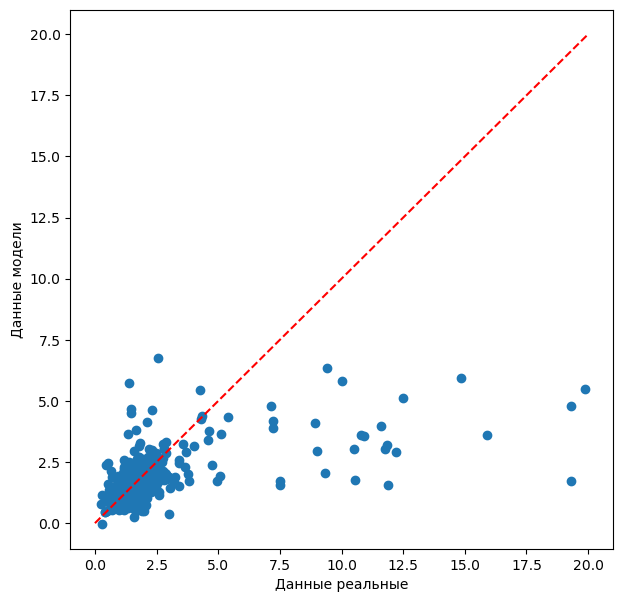

In [13]:
src.lib.model_score(model, X, y)

In [14]:
pred = model.predict(X)

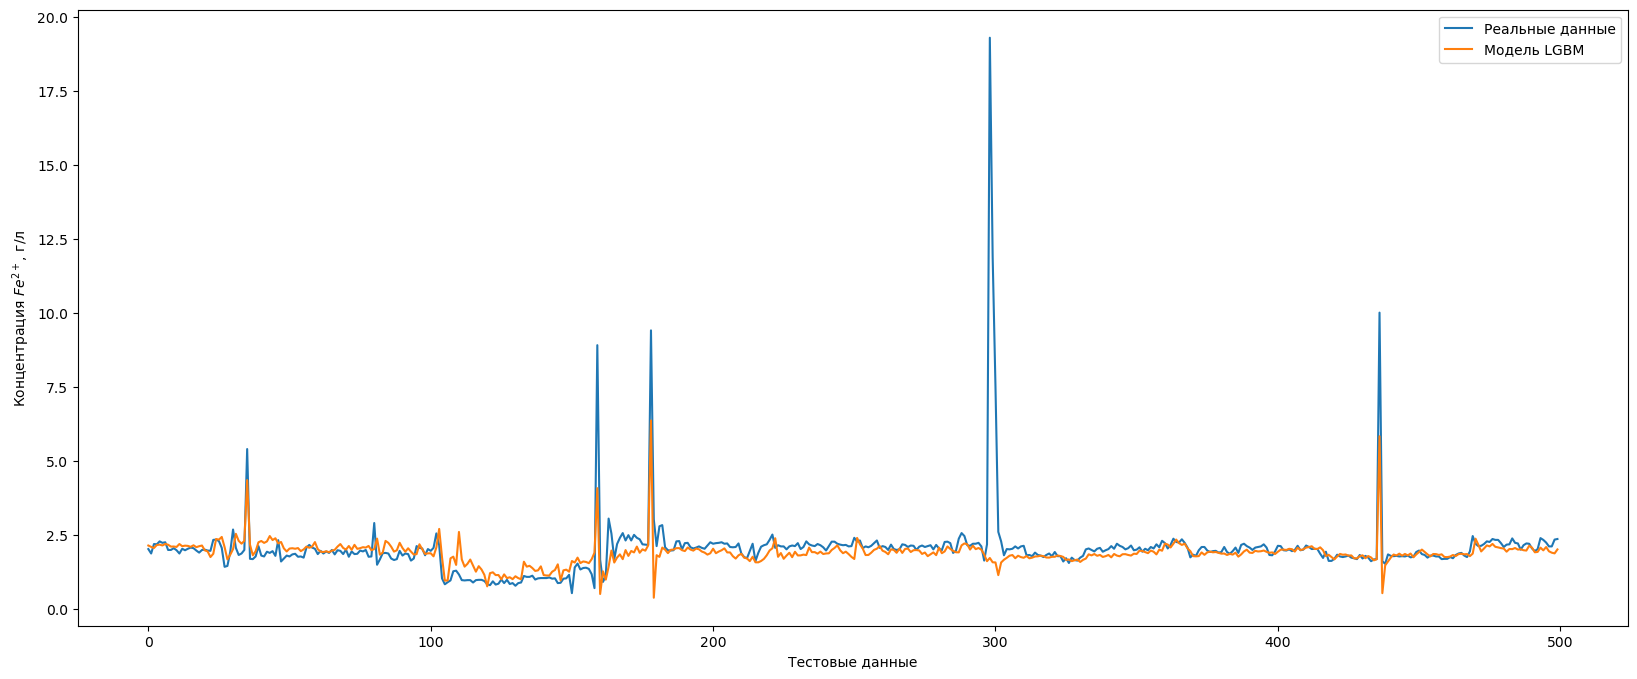

In [16]:
plt.figure(figsize=(20,8))

start = 500
end = 1000

plt.plot(y.values[start:end], label='Реальные данные')
plt.plot(pred[start:end], label='Модель LGBM')

plt.ylabel("Концентрация $Fe^{2+}$, г/л")
plt.xlabel('Тестовые данные')

plt.legend()
plt.show();